In [1]:
!wget http://astropedia.astrogeology.usgs.gov/download/Moon/Research/Craters/lunar_crater_database_robbins_2018
!unzip lunar_crater_database_robbins_2018

URL transformed to HTTPS due to an HSTS policy
--2019-07-03 09:56:03--  https://astropedia.astrogeology.usgs.gov/download/Moon/Research/Craters/lunar_crater_database_robbins_2018
Resolving astropedia.astrogeology.usgs.gov (astropedia.astrogeology.usgs.gov)... 137.227.239.81, 2001:49c8:c000:122d::81
Connecting to astropedia.astrogeology.usgs.gov (astropedia.astrogeology.usgs.gov)|137.227.239.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96227201 (92M) [application/zip]
Saving to: ‘lunar_crater_database_robbins_2018’

lunar_crater_databa 100%[===================>]  91.77M  19.5MB/s    in 5.0s    

2019-07-03 09:56:08 (18.3 MB/s) - ‘lunar_crater_database_robbins_2018’ saved [96227201/96227201]

Archive:  lunar_crater_database_robbins_2018
  inflating: lunar_crater_database_robbins_2018_bundle/bundle_checksums.txt  
  inflating: lunar_crater_database_robbins_2018_bundle/bundle_checksums.xml  
   creating: lunar_crater_database_robbins_2018_bundle/data/
  infl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cc = pd.read_csv('lunar_crater_database_robbins_2018_bundle/data/lunar_crater_database_robbins_2018.csv',usecols=[1,2,5], names=['Lat','Lon','Diam_km'], header=0)

In [4]:
!rm -r lunar_crater*

In [5]:
cc.tail()

,Lat,Lon,Diam_km
1296791,-65.6258,203.5000,5.93636
1296792,-60.0296,178.7090,7.82310
1296793,-66.7921,219.3790,11.55320
1296794,-79.8374,62.1794,7.16411
1296795,-79.6855,61.9220,8.81959


In [6]:
cc.describe()

,Lat,Lon,Diam_km
count,1.296796e+06,1.296796e+06,1.296796e+06
mean,-1.317424e+00,1.664051e+02,2.436963e+00
std,4.356372e+01,9.680522e+01,5.519133e+00
min,-8.984790e+01,5.172670e-04,1.000000e+00
25%,-3.703373e+01,8.813620e+01,1.242710e+00
50%,-3.664890e+00,1.594180e+02,1.606840e+00
75%,3.326443e+01,2.386270e+02,2.380860e+00
max,8.997350e+01,3.600000e+02,2.491870e+03


In [7]:
# lon is between 0 and 360, lets make it compatible with the other catalogs: 
cc.loc[cc.Lon>180,'Lon']-=360
cc.describe()

,Lat,Lon,Diam_km
count,1.296796e+06,1.296796e+06,1.296796e+06
mean,-1.317424e+00,1.119930e+01,2.436963e+00
std,4.356372e+01,1.099583e+02,5.519133e+00
min,-8.984790e+01,-1.799990e+02,1.000000e+00
25%,-3.703373e+01,-9.226525e+01,1.242710e+00
50%,-3.664890e+00,2.494825e+01,1.606840e+00
75%,3.326443e+01,1.090320e+02,2.380860e+00
max,8.997350e+01,1.800000e+02,2.491870e+03


In [8]:
cc.to_csv('RobbinsLunarCraters.csv')

1296482
314


(0.1, 10)

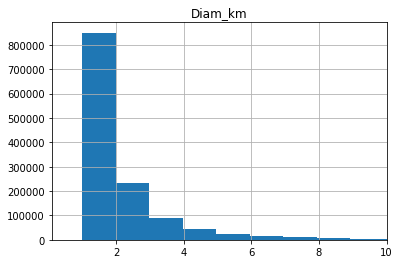

In [14]:
cc_small = cc[cc.Diam_km<=100]
print(len(cc_small))
cc_large = cc[cc.Diam_km>100]
print(len(cc_large))
%matplotlib inline
ax1 = cc_small.hist('Diam_km', bins=100)
plt.xlim(0.1, 10)

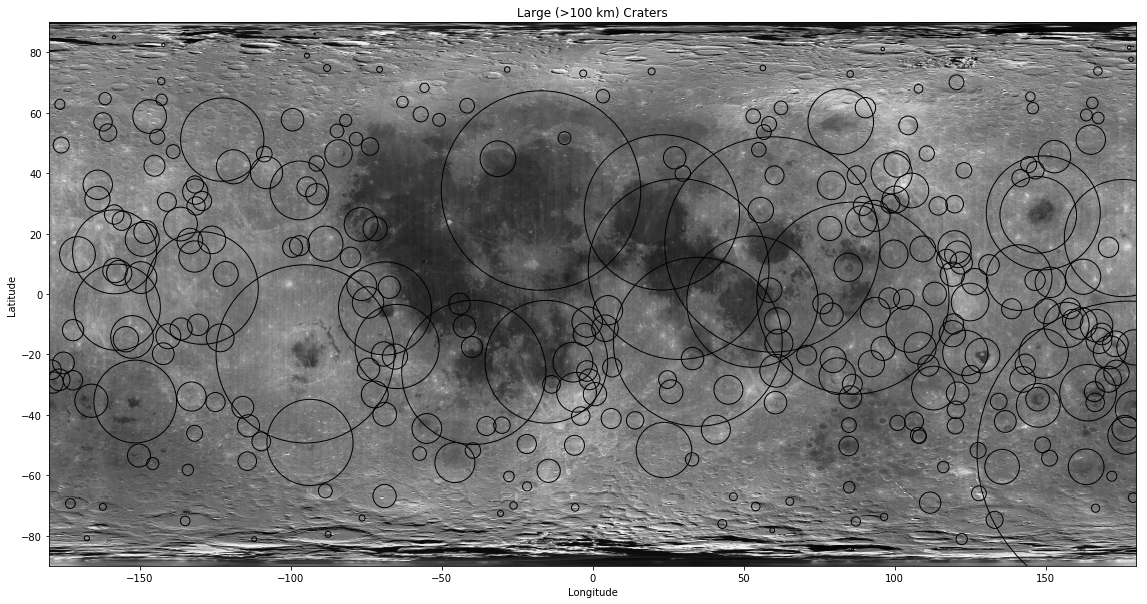

In [23]:
from PIL import Image
import numpy as np
# from matplotlib.patches import Circle
data_path = '../../data/'
albedo = Image.open(data_path + "/Clementine_albedo_simp750.jpg")

fig = plt.figure(figsize=[20, 10])
ax1 = plt.subplot(1,1,1)
al_map = plt.imshow(albedo, extent=[-180, 180, -90, 90], aspect="equal", cmap="Greys_r")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.title('Large (>100 km) Craters')
for index, row in cc_large.iterrows():
    crater = plt.Circle((row.Lon,row.Lat),row.Diam_km/30*np.cos(row.Lat*np.pi/180), fill=False)
    ax1.add_artist(crater)

In [11]:
Head_cat = pd.read_csv('HeadCraters.csv')
Head_cat.describe()

,Lon,Lat,Diam_km
count,5185.000000,5185.000000,5185.000000
mean,4.114668,-2.331241,49.001956
std,112.754106,42.289284,58.221536
min,-179.907371,-89.665152,20.002922
25%,-107.802826,-37.290236,26.286700
50%,16.450301,-4.487789,35.595754
75%,107.130554,32.441183,54.461012
max,179.997469,89.324090,2050.000000


In [12]:
Lroc_cat = pd.read_csv('LROCCraters.csv')
Lroc_cat.describe()

,Unnamed: 0,Unnamed: 0.1,Diameter (km),Long,Lat
count,19335.000000,19335.000000,19335.000000,19335.000000,19335.000000
mean,9667.000000,2761.611223,9.282498,-3.807475,0.702698
std,5581.678063,1859.005275,3.660448,120.990921,33.504527
min,0.000000,0.000000,5.000366,-179.986817,-59.993181
25%,4833.500000,1208.000000,6.280987,-127.400534,-28.553390
50%,9667.000000,2416.000000,8.208874,7.320071,2.618287
75%,14500.500000,4167.500000,11.511464,113.734527,28.876517
max,19334.000000,6981.000000,19.997352,179.964281,59.987146
